# The Boston Housing Price dataset

**We will be attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the suburb at the time, such as the crime rate, the local property tax rate, etc.**

**The dataset we will be using has another interesting difference from our two previous examples: it has very few data points, only 506 in total, split between 404 training samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a feature) has a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, others between 0 and 100...**

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 1s 13us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

### The 13 features in the input data are as follow:

- Per capita crime rate.
- Proportion of residential land zoned for lots over 25,000 square feet.
- Proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Ni tric oxides concentration (parts per 10 million).
- Average number of rooms per dwelling.
- Proportion of owner-occupied units built prior to 1940.
- Weighted distances to five Boston employment centres.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- % lower status of the population.

**The targets are the median values of owner-occupied homes, in thousands of dollars:**

In [4]:
train_targets


array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [5]:
#Min and Max Price in thousand dollars.
print(train_targets.min())
print(train_targets.max())

5.0
50.0


In [6]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

**Data Normalization by extracting the mean and standard deviation then subtract the mean from every value and divide by the std. This can be performed easily using numpy as follows: **

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [8]:
train_data.mean()

2.602301889250862e-15

In [9]:
from keras  import models
from keras  import layers

def  build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [10]:
fnn = build_model()
fnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [11]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=1)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


processing fold # 0
Epoch 1/100
303/303 [==============================] - 2s 6ms/step - loss: 221.9801 - mean_absolute_error: 11.2536
Epoch 2/100
303/303 [==============================] - 1s 2ms/step - loss: 32.0759 - mean_absolute_error: 3.9782
Epoch 3/100
303/303 [==============================] - 1s 2ms/step - loss: 21.1193 - mean_absolute_error: 3.1606
Epoch 4/100
303/303 [==============================] - 1s 2ms/step - loss: 17.1384 - mean_absolute_error: 2.7981
Epoch 5/100
303/303 [==============================] - 1s 2ms/step - loss: 16.0701 - mean_absolute_error: 2.6188
Epoch 6/100
303/303 [==============================] - 1s 2ms/step - loss: 14.2388 - mean_absolute_error: 2.5482
Epoch 7/100
303/303 [==============================] - 1s 2ms/step - loss: 13.7580 - mean_absolute_error: 2.4155
Epoch 8/100
303/303 [==============================] - 1s 2ms/step - loss: 12.7052 - mean_absolute_error: 2.4104
Epoch 9/100
303/303 [==============================] - 1s 2ms/step - loss:

In [12]:
# check scores
all_scores


[2.2353893506644975, 2.117116904494786, 2.8419671200289587, 2.355090566200785]

In [13]:
# average score

np.mean(all_scores)


2.387390985347257

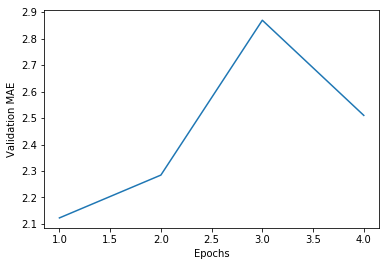

In [20]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.plot(range(1, len(all_scores) + 1), all_scores)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### Here's what you should take away from this example:

- Regression is done using different loss functions from classification; Mean Squared Error (MSE) is a commonly used loss function for regression.
- Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally the concept of "accuracy" does not apply for regression. A common regression metric is Mean Absolute Error (MAE).
- When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
- When there is little data available, using K-Fold validation is a great way to reliably evaluate a model.
- When little training data is available, it is preferable to use a small network with very few hidden layers (typically only one or two), in order to avoid severe overfitting.